# HR Analytics Project- Understanding the Attrition in HR

### Problem Statement:
> Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs  is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the 
performance of employees?


> #### HR Analytics

> Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

> #### Attrition in HR

>Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

>How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

> #### Attrition affecting Companies

>A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

### Importing Required libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler,power_transform
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [60]:
hr_df=pd.read_csv('https://raw.githubusercontent.com/rajsharma-bot/CSV-Data-file/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr_df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [61]:
hr_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [62]:
hr_df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [64]:
hr_df.sample(2)

Age Attrition     BusinessTravel  DailyRate Department  DistanceFromHome  \
801   50       Yes  Travel_Frequently        959      Sales                 1   
567   34        No      Travel_Rarely        304      Sales                 2   

     Education EducationField  EmployeeCount  EmployeeNumber  ...  \
801          4          Other              1            1113  ...   
567          3          Other              1             786  ...   

     RelationshipSatisfaction StandardHours  StockOptionLevel  \
801                         4            80                 0   
567                         3            80                 0   

     TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
801                  5                      4               3               0   
567                  6                      5               3               6   

    YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
801                  0                        0                     0  
567                  5                        1                     4  

[2 rows x 35 columns]

### EDA

In [65]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [66]:
hr_df.shape

(1470, 35)

there is 35 columns and 1470 rows in provided dataset

In [68]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [69]:
hr_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

From above output we can see that we have many object type data so we need scale data

In [70]:
hr_df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

above output we can see details description of dataset

### finding null values

In [71]:
#to checking null value in dataset
hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

as per above output we can see that there is no null value in data-set

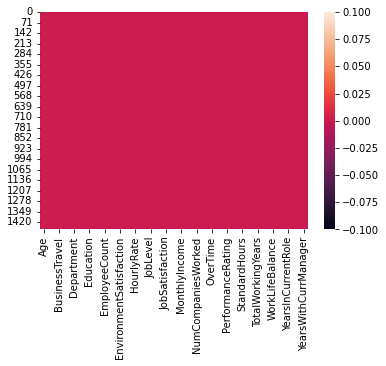

In [72]:
sns.heatmap(hr_df.isnull())
plt.show()

there is no null values in the data

## Data Cleaning

In [73]:
for i in hr_df.columns:
    if hr_df[i].dtype==object:
        print(str(i)+":" +str(df[i].unique())) #To show unique value
        print(str(i)+":"+str(df[i].nunique())) #To show no of unique values
        print(df[i].value_counts()) #To show count 
        print("*******************************")

Attrition:['Yes' 'No']
Attrition:2
No     1233
Yes     237
Name: Attrition, dtype: int64
*******************************
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel:3
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*******************************
Department:['Sales' 'Research & Development' 'Human Resources']
Department:3
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
*******************************
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField:6
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
*******************************
Gender:['Female' 'Male']
Gender:2
Male      882
Female    588
Name: Gender, dtype: int64
***

many columns have a object type of data which shows details of those columns

In [74]:
for j in hr_df.columns:
    if hr_df[j].nunique()==1:
        print(str(j) , str(hr_df[j].nunique()), "Dtype",hr_df[j].dtype, end='\n')
        print('*********************')
        
#Column EmployeeNumber shows number of employee present         
print("EmployeeNumber",hr_df['EmployeeNumber'].nunique() ," Dtype", hr_df['EmployeeNumber'].dtype )

EmployeeCount 1 Dtype int64
*********************
Over18 1 Dtype object
*********************
StandardHours 1 Dtype int64
*********************
EmployeeNumber 1470  Dtype int64


As per above output we can see that for this column there is only one unique number,these columns no need for the prediction of model and for EmployeeNumber shows number of employee present 

In [75]:
#removing below mentioned columns from dataset
hr_df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)
hr_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

## Data Visualization

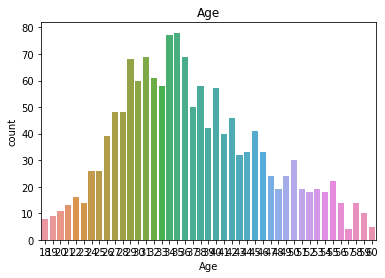

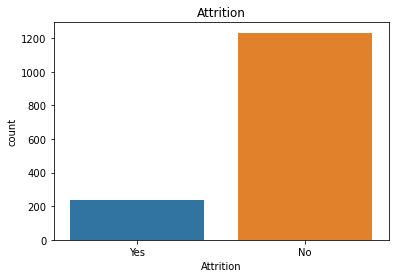

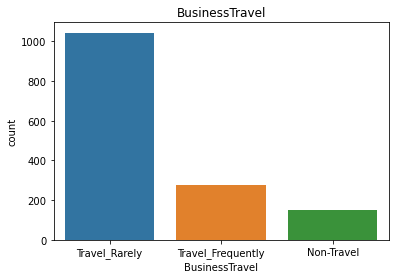

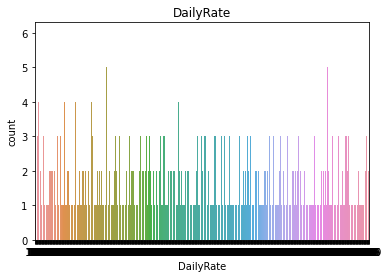

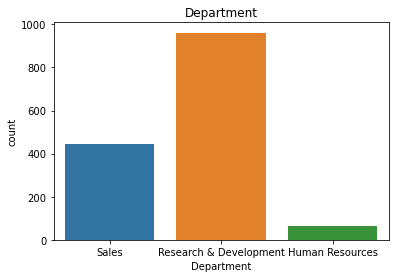

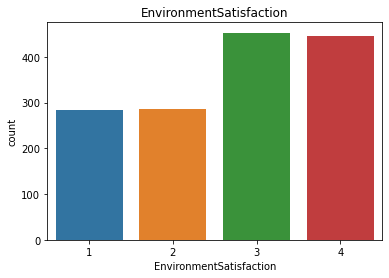

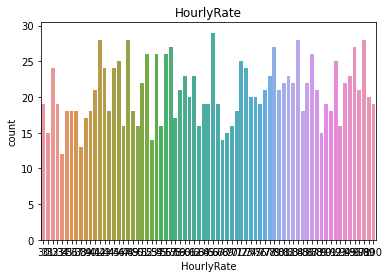

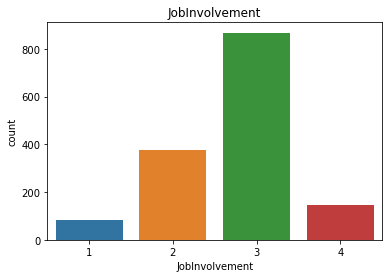

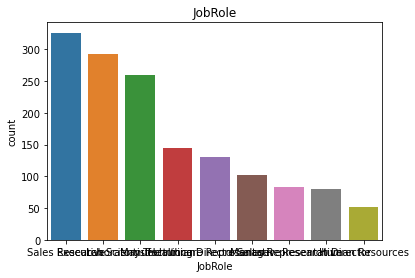

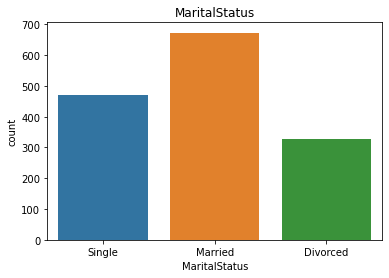

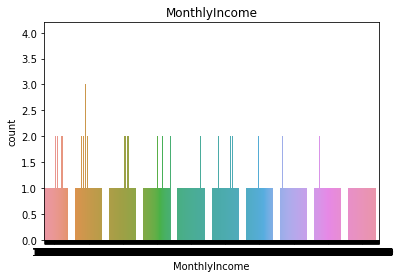

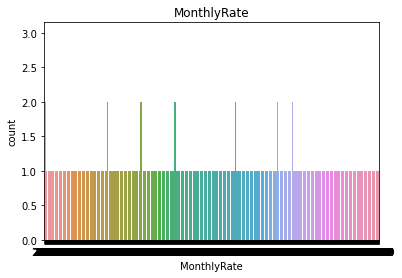

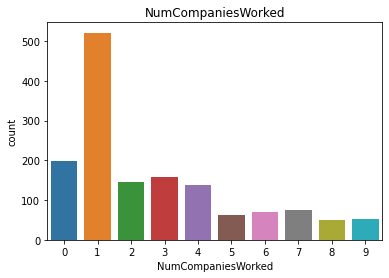

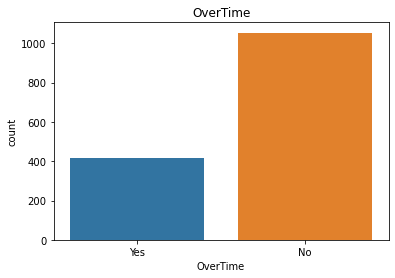

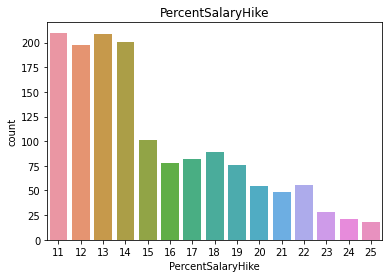

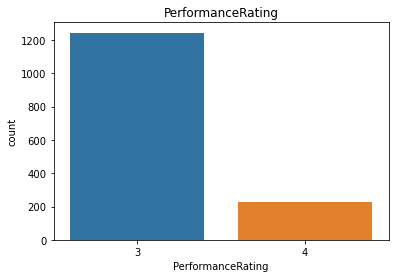

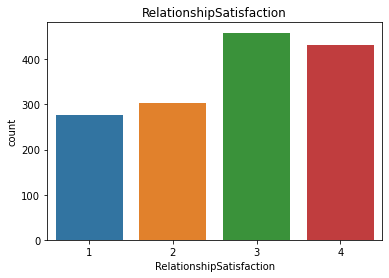

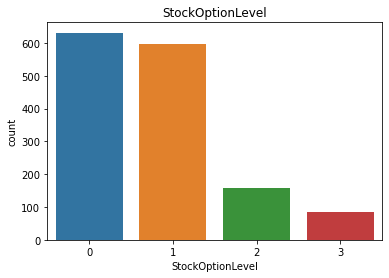

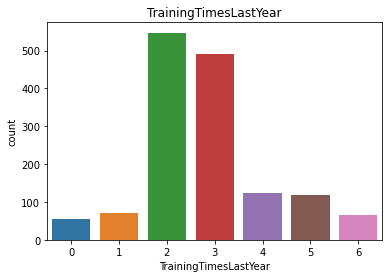

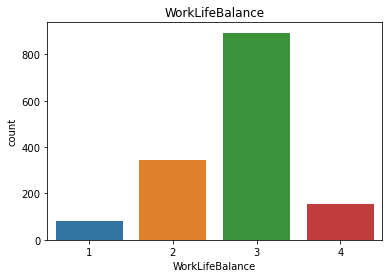

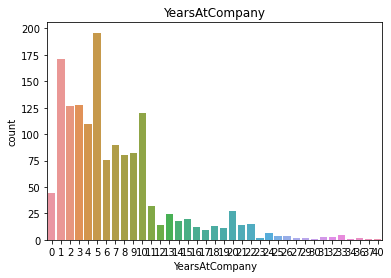

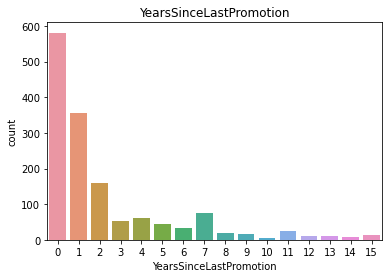

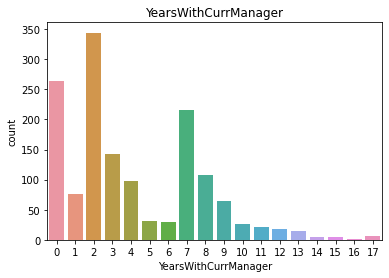

In [78]:
for col in hr_df.columns:
    sns.countplot(hr_df[col])
    plt.title(col)
    plt.show()

In [80]:
plt.figure(figsize=(14,6))
sns.countplot(hr_df['JobRole'])
plt.xticks(rotation=45)
plt.show()

In [81]:
#Hist plotting

df.hist(figsize=(20,20))
plt.show()

### Encoding data using LabelEncoder()

In [84]:
for col in hr_df.columns:
    if hr_df[col].dtype==object:
        print(str(col),end='\n')

Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


In [86]:
labelEnd=LabelEncoder()
var=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

for i in var:
    hr_df[i]=labelEnd.fit_transform(hr_df[i])
hr_df.head(10)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   
5   32          0               1       1005           1                 2   
6   59          0               2       1324           1                 3   
7   30          0               2       1358           1                24   
8   38          0               1        216           1                23   
9   36          0               2       1299           1                27   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   
5          2               1                        4       1  ...   
6          3               3                        3       0  ...   
7          1               1                        4       1  ...   
8          3               1                        4       1  ...   
9          3               3                        3       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   
5                  3                         3                 0   
6                  4                         1                 3   
7                  4                         2                 1   
8                  4                         2                 0   
9                  3                         2                 2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   
5                  8                      2                2               7   
6                 12                      3                2               1   
7                  1                      2                3               1   
8                 10                      2                3               9   
9                 17                      3                2               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  
5                   7                        3                     6  
6                   0                        0                     0  
7                   0                        0                     0  
8                   7                        1                     8  
9                   7            

As per above table label encoding done for object type of columns

In [88]:
hr_df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

### Correlation

In [89]:
hr_df.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
PercentSalaryHike          -0.007840          0.040235  -0.011111   
PerformanceRating          -0.024604          0.027110  -0.024539   
Relationshi

In [93]:
plt.figure(figsize=(22,14))
sns.heatmap(hr_df.corr(),cmap='YlGnBu',fmt= '.0%',annot=True)

<AxesSubplot:>

above plot shows positive and negetive correlationship between features and labels

Checking Multicollinearity

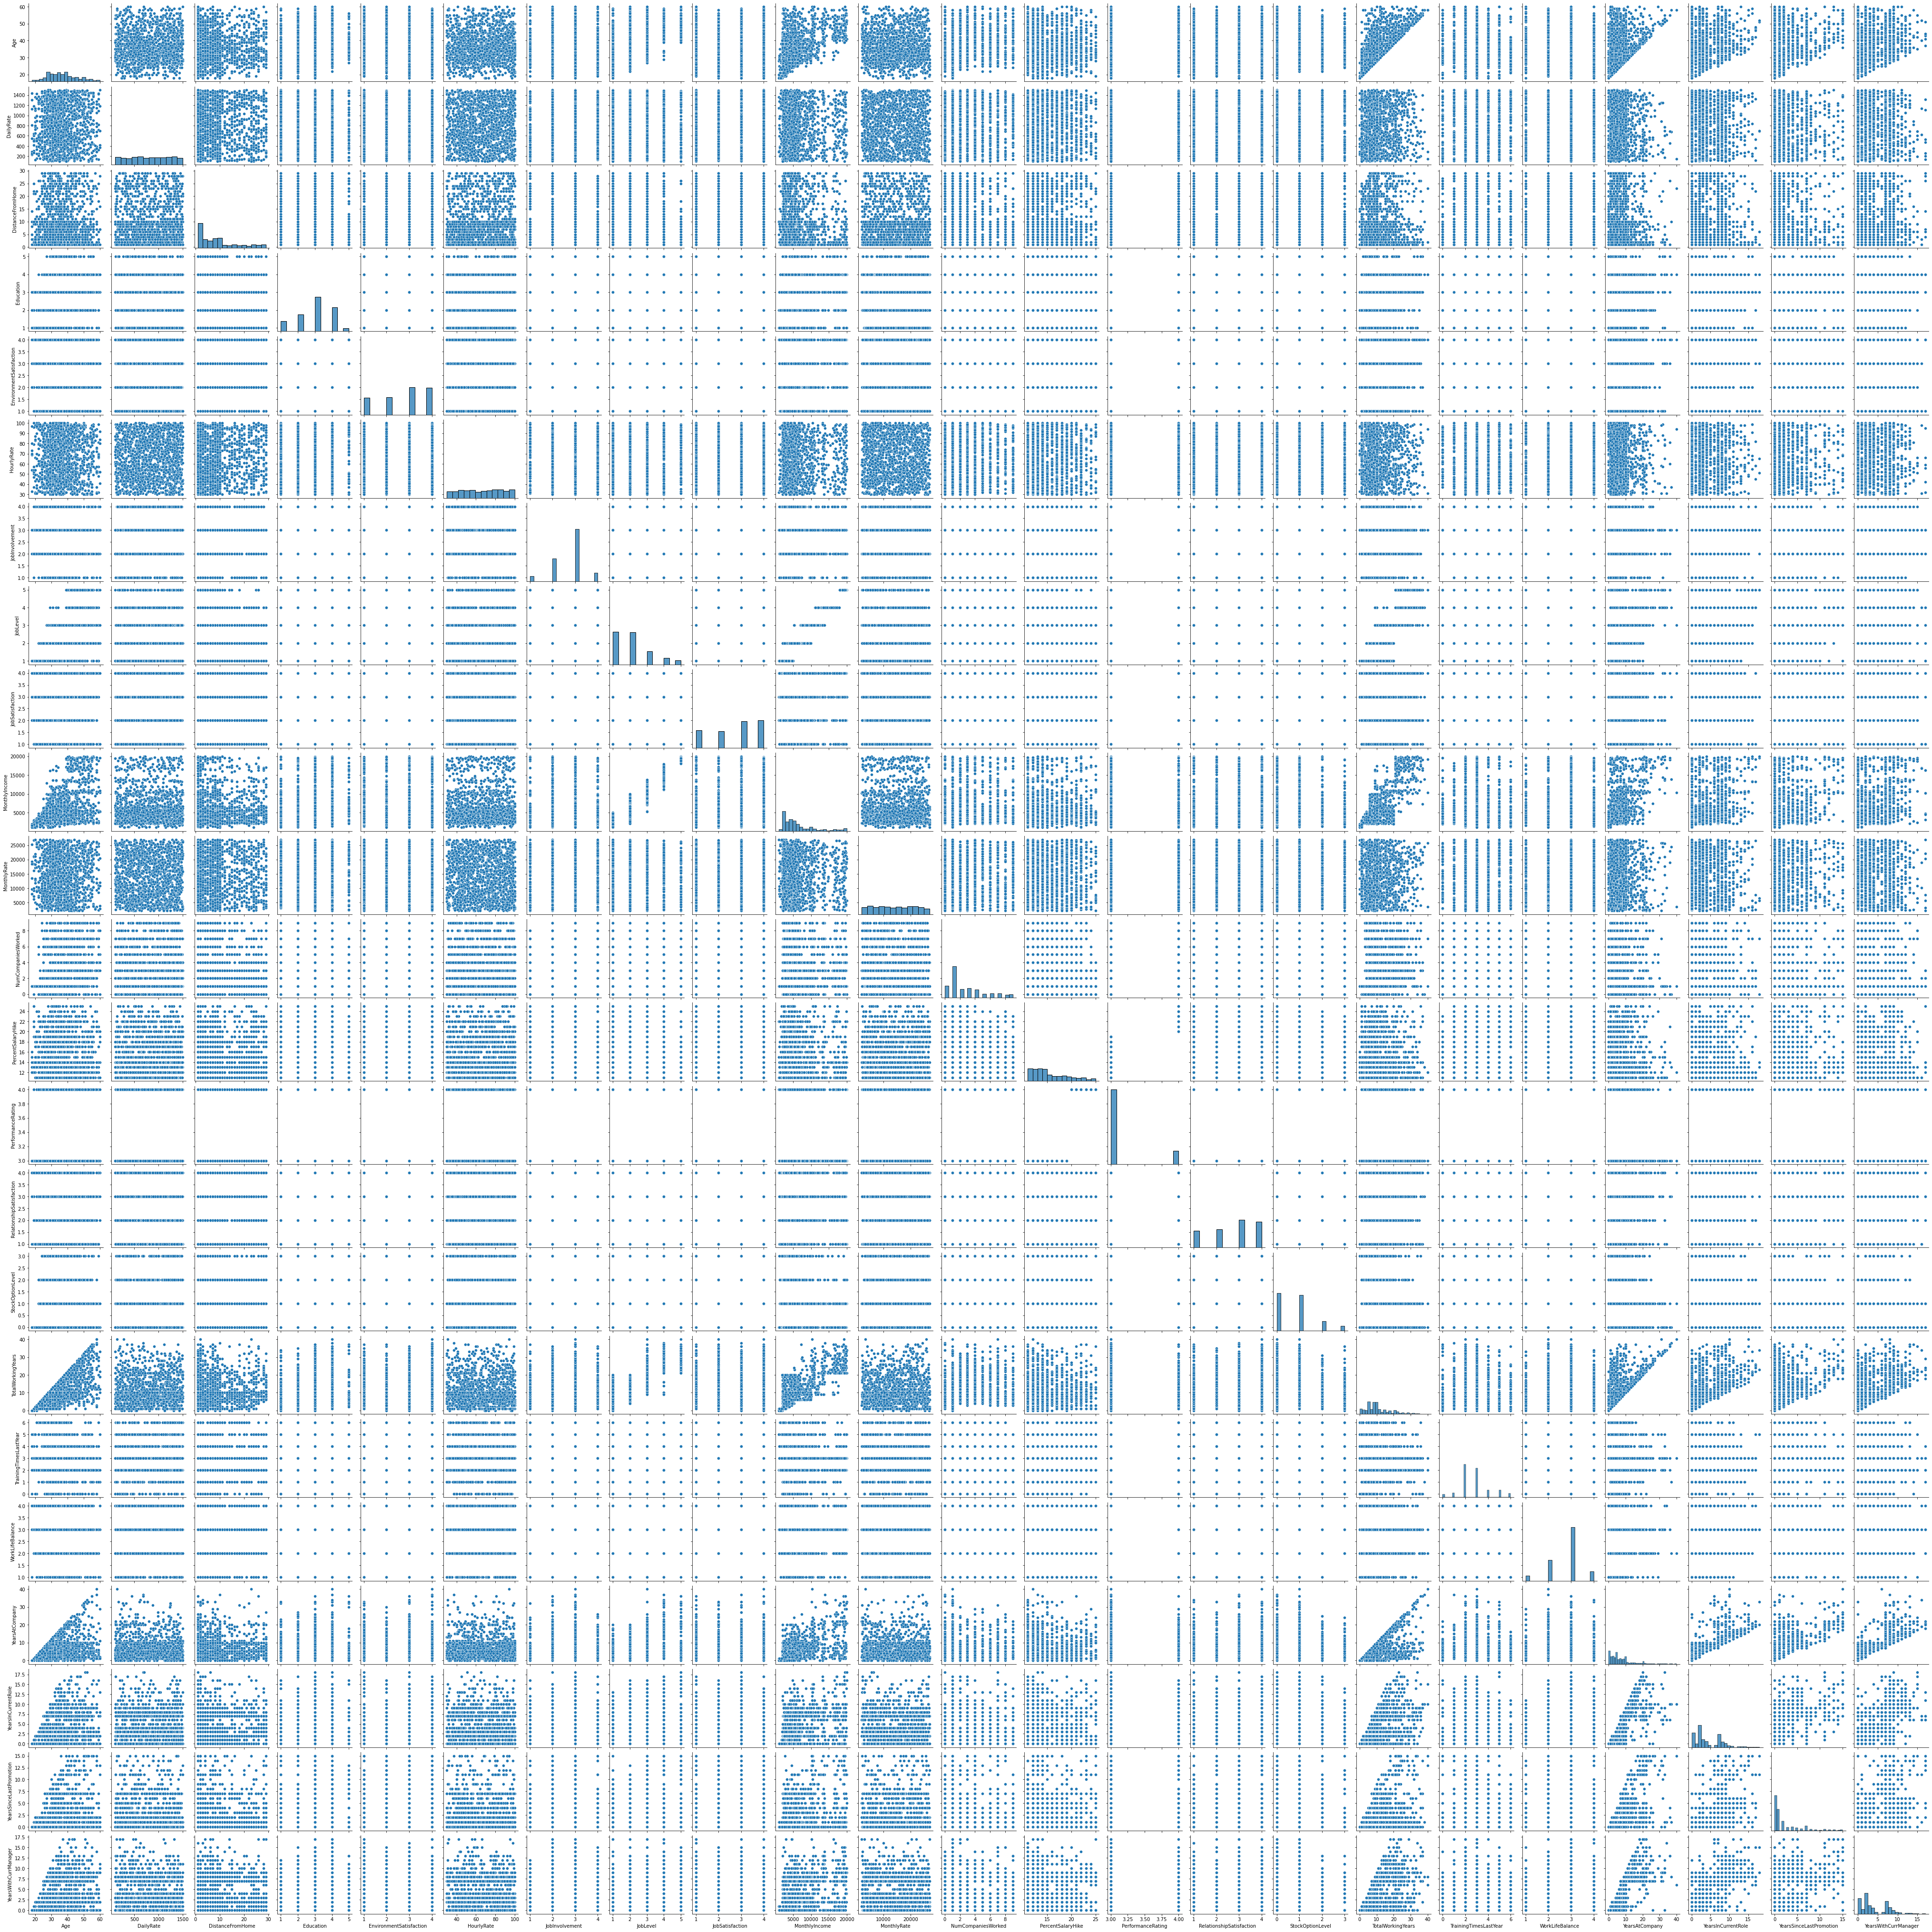

In [83]:
sns.pairplot(hr_df)

### Skewness

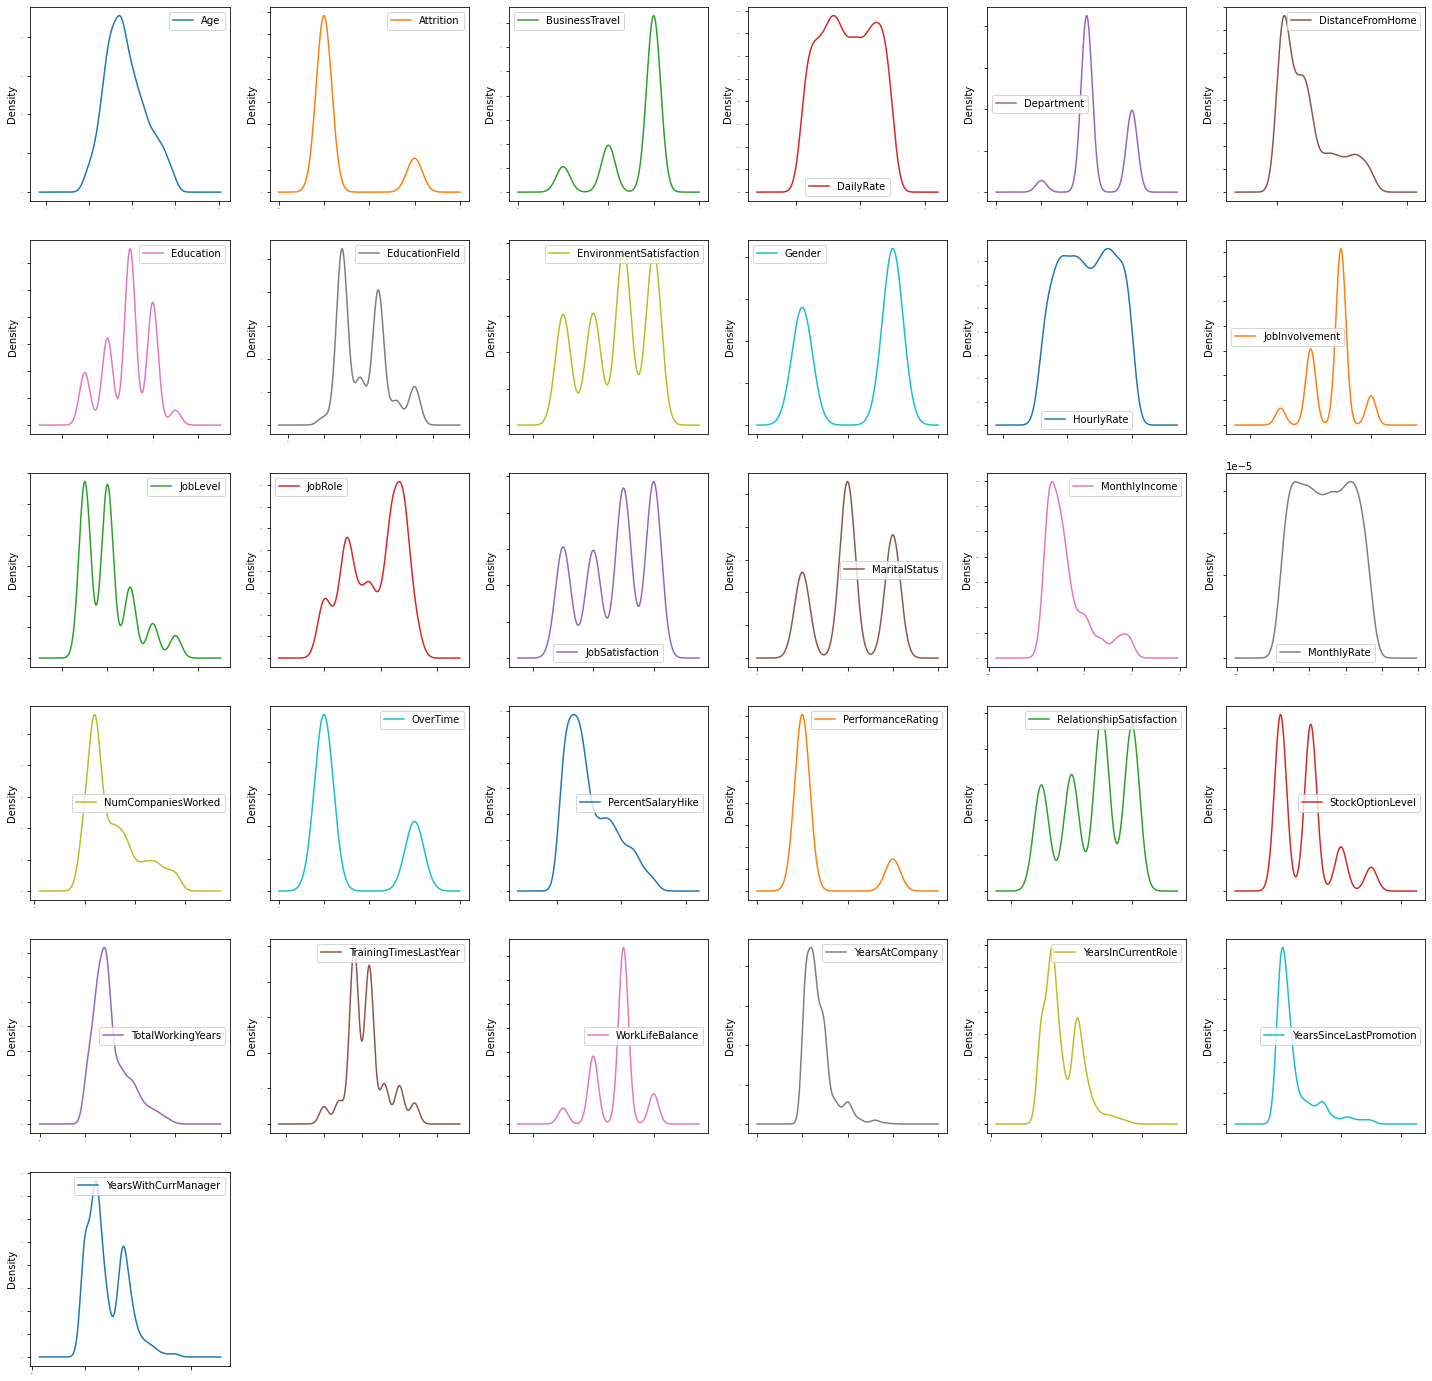

In [99]:
hr_df.plot(kind='density',subplots=True,layout=(6,6),sharex=False,figsize=(25,25),fontsize=1,legend=True)
plt.show()

From above plotting we can see some right side skewed data


In [100]:
hr_df.skew().sort_values()

BusinessTravel             -1.439006
WorkLifeBalance            -0.552480
JobInvolvement             -0.498419
Gender                     -0.408665
JobRole                    -0.357270
JobSatisfaction            -0.329672
EnvironmentSatisfaction    -0.321654
RelationshipSatisfaction   -0.302828
Education                  -0.289681
MaritalStatus              -0.152175
HourlyRate                 -0.032311
DailyRate                  -0.003519
MonthlyRate                 0.018578
Department                  0.172231
Age                         0.413286
EducationField              0.550371
TrainingTimesLastYear       0.553124
PercentSalaryHike           0.821128
YearsWithCurrManager        0.833451
YearsInCurrentRole          0.917363
DistanceFromHome            0.958118
OverTime                    0.964489
StockOptionLevel            0.968980
JobLevel                    1.025401
NumCompaniesWorked          1.026471
TotalWorkingYears           1.117172
MonthlyIncome               1.369817
Y

In [102]:
#Removing Skewness
hr_df_skew=np.sqrt(hr_df[hr_df.columns])
hr_df_skew.skew()

Age                         0.141061
Attrition                   1.844366
BusinessTravel             -2.059006
DailyRate                  -0.405332
Department                 -1.675701
DistanceFromHome            0.398114
Education                  -0.696432
EducationField             -0.162769
EnvironmentSatisfaction    -0.569620
Gender                     -0.408665
HourlyRate                 -0.236832
JobInvolvement             -0.965626
JobLevel                    0.593923
JobRole                    -1.186878
JobSatisfaction            -0.570905
MaritalStatus              -0.905174
MonthlyIncome               0.861960
MonthlyRate                -0.351785
NumCompaniesWorked          0.031303
OverTime                    0.964489
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.559689
StockOptionLevel            0.057528
TotalWorkingYears           0.176358
TrainingTimesLastYear      -1.216268
WorkLifeBalance            -1.033670
Y

### Checking Outliers

In [103]:
hr_df.boxplot(figsize=(20,12))
plt.subplots_adjust(bottom=0.5)
plt.show()

In [105]:
(np.abs(zscore(hr_df)<3)).all()

Age                          True
Attrition                    True
BusinessTravel               True
DailyRate                    True
Department                   True
DistanceFromHome             True
Education                    True
EducationField               True
EnvironmentSatisfaction      True
Gender                       True
HourlyRate                   True
JobInvolvement               True
JobLevel                     True
JobRole                      True
JobSatisfaction              True
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                  True
NumCompaniesWorked           True
OverTime                     True
PercentSalaryHike            True
PerformanceRating            True
RelationshipSatisfaction     True
StockOptionLevel             True
TotalWorkingYears           False
TrainingTimesLastYear        True
WorkLifeBalance              True
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

We can see  lot of columns have a outlies,so we need sort out/remove outliers

## Removing Outliers

In [106]:
score=np.abs(zscore(hr_df_skew))
t=3
np.where(score<3)

(array([   0,    0,    0, ..., 1469, 1469, 1469], dtype=int64),
 array([ 0,  1,  2, ..., 28, 29, 30], dtype=int64))

In [107]:
hr_df1=hr_df_skew[(score<3).all(axis=1)]
hr_df1

Age  Attrition  BusinessTravel  DailyRate  Department  \
1     7.000000        0.0        1.000000  16.703293    1.000000   
2     6.082763        1.0        1.414214  37.054015    1.000000   
3     5.744563        0.0        1.000000  37.309516    1.000000   
4     5.196152        0.0        1.414214  24.310492    1.000000   
5     5.656854        0.0        1.000000  31.701735    1.000000   
...        ...        ...             ...        ...         ...   
1464  5.099020        0.0        1.414214  34.161382    1.414214   
1465  6.000000        0.0        1.000000  29.732137    1.000000   
1466  6.244998        0.0        1.414214  24.758837    1.000000   
1468  7.000000        0.0        1.000000  31.984371    1.414214   
1469  5.830952        0.0        1.414214  25.059928    1.000000   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
1             2.828427   1.000000        1.000000                 1.732051   
2             1.414214   1.414214        2.000000                 2.000000   
3             1.732051   2.000000        1.000000                 2.000000   
4             1.414214   1.000000        1.732051                 1.000000   
5             1.414214   1.414214        1.000000                 2.000000   
...                ...        ...             ...                      ...   
1464          2.236068   1.732051        2.000000                 2.000000   
1465          4.795832   1.414214        1.732051                 1.732051   
1466          2.449490   1.000000        1.732051                 2.000000   
1468          1.414214   1.732051        1.732051                 2.000000   
1469          2.828427   1.732051        1.732051                 1.414214   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
1        1.0  ...           2.000000                  2.000000   
2        1.0  ...           1.732051                  1.414214   
3        0.0  ...           1.732051                  1.732051   
4        1.0  ...           1.732051                  2.000000   
5        1.0  ...           1.732051                  1.732051   
...      ...  ...                ...                       ...   
1464     0.0  ...           1.732051                  2.000000   
1465     1.0  ...           1.732051                  1.732051   
1466     1.0  ...           1.732051                  1.000000   
1468     1.0  ...           1.732051                  2.000000   
1469     1.0  ...           1.732051                  1.000000   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1                  1.0           3.162278               1.732051   
2                  0.0           2.645751               1.732051   
3                  0.0           2.828427               1.732051   
4                  1.0           2.449490               1.732051   
5                  0.0           2.828427               1.414214   
...                ...                ...                    ...   
1464               0.0           2.236068               1.414214   
1465               1.0           4.123106               1.732051   
1466               1.0           3.000000               2.236068   
1468               0.0           4.123106               1.732051   
1469               0.0           2.449490               1.732051   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1            1.732051        3.162278            2.645751   
2            1.732051        0.000000            0.000000   
3            1.732051        2.828427            2.645751   
4            1.732051        1.414214            1.414214   
5            1.414214        2.645751            2.645751   
...               ...             ...                 ...   
1464         1.732051        2.000000            1.414214   
1465         1.732051        2.236068            1.414214   
1466         1.732051        2.645751            2.645751   
1468         1.414214        3.000000

# Pre-processing Data

In [108]:
hr_df_new=power_transform(hr_df1)
hr_df_new

array([[ 1.30535137, -0.42976339, -1.22786136, ...,  0.83841159,
         0.26385798,  0.86503927],
       [ 0.1173182 ,  2.32686177,  0.62619046, ..., -1.6692343 ,
        -1.13730724, -1.62784389],
       [-0.34346961, -0.42976339, -1.22786136, ...,  0.83841159,
         0.84311013, -1.62784389],
       ...,
       [ 0.33377121, -0.42976339,  0.62619046, ...,  0.83841159,
         0.26385798,  0.86503927],
       [ 1.30535137, -0.42976339, -1.22786136, ...,  0.64128879,
        -1.13730724,  1.04667169],
       [-0.22449826, -0.42976339,  0.62619046, ..., -0.06713394,
         0.26385798, -0.33288656]])

In [109]:
hr_df2=pd.DataFrame(hr_df_new,columns=hr_df1.columns)
hr_df2

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     1.305351  -0.429763       -1.227861  -1.354432   -0.683608   
1     0.117318   2.326862        0.626190   1.338076   -0.683608   
2    -0.343470  -0.429763       -1.227861   1.378426   -0.683608   
3    -1.120495  -0.429763        0.626190  -0.476827   -0.683608   
4    -0.465178  -0.429763       -1.227861   0.527420   -0.683608   
...        ...        ...             ...        ...         ...   
1342 -1.262284  -0.429763        0.626190   0.891648    1.462826   
1343  0.005773  -0.429763       -1.227861   0.246285   -0.683608   
1344  0.333771  -0.429763        0.626190  -0.419959   -0.683608   
1345  1.305351  -0.429763       -1.227861   0.568539    1.462826   
1346 -0.224498  -0.429763        0.626190  -0.381465   -0.683608   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0             0.231784  -1.773440       -1.095860                 0.223743   
1            -1.020290  -0.905203        1.226209                 1.205016   
2            -0.689898   1.087723       -1.095860                 1.205016   
3            -1.020290  -1.773440        0.742622                -1.523570   
4            -1.020290  -0.905203       -1.095860                 1.205016   
...                ...        ...             ...                      ...   
1342         -0.231162   0.049805        1.226209                 1.205016   
1343          1.406564  -0.905203        0.742622                 0.223743   
1344         -0.056152  -1.773440        0.742622                 1.205016   
1345         -1.020290   0.049805        0.742622                 1.205016   
1346          0.231784   0.049805        0.742622                -0.686507   

        Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     0.828165  ...       1.040834e-16                  1.231254   
1     0.828165  ...      -1.734723e-17                 -0.674596   
2    -1.207489  ...      -1.734723e-17                  0.246978   
3     0.828165  ...      -1.734723e-17                  1.231254   
4     0.828165  ...      -1.734723e-17                  0.246978   
...        ...  ...                ...                       ...   
1342 -1.207489  ...      -1.734723e-17                  1.231254   
1343  0.828165  ...      -1.734723e-17                  0.246978   
1344  0.828165  ...      -1.734723e-17                 -1.533262   
1345  0.828165  ...      -1.734723e-17                  1.231254   
1346  0.828165  ...      -1.734723e-17                 -1.533262   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             0.631236           0.035125               0.258008   
1            -1.119935          -0.423887               0.258008   
2            -1.119935          -0.260839               0.258008   
3             0.631236          -0.599993               0.258008   
4            -1.119935          -0.260839              -0.749356   
...                ...                ...                    ...   
1342         -1.119935          -0.792662              -0.749356   
1343          0.631236           0.874117               0.258008   
1344          0.631236          -0.108422               1.561479   
1345         -1.119935           0.874117               0.258008   
1346         -1.119935          -0.599993               0.258008   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0            0.287914        0.736527            0.838412   
1            0.287914       -2.448490           -1.669234   
2            0.287914        0.442485            0.838412   
3            0.287914       -0.887350           -0.374098   
4           -1.098590        0.278845            0.838412   
...               ...             ...                 ...   
1342         0.287914       -0.317436           -0.374098   
1343         0.287914       -0.095992           -0.374098   
1344         0.287914        0.278845            0.838412   
1345        -

### Splitting features and labels

In [110]:
X=hr_df2.drop('Attrition',axis=1)
y=hr_df1['Attrition']

In [113]:
X.sample(2)

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
55  -0.589772         0.62619  -0.312720   -0.683608          0.096356   
206  0.226617         0.62619  -1.899732    1.462826         -0.689898   

     Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
55    1.087723        -1.09586                 1.205016  0.828165   -0.864844   
206   0.049805        -1.09586                -1.523570  0.828165    0.520232   

     ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
55   ...       1.040834e-16                  1.231254          0.631236   
206  ...      -1.734723e-17                  0.246978          1.190327   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
55            0.035125               0.258008         -1.09859   
206           0.874117               2.031528         -1.09859   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
55         0.278845            0.838412                 0.263858   
206        1.449383            1.363258                 1.145069   

     YearsWithCurrManager  
55               0.865039  
206              1.828809  

[2 rows x 30 columns]

In [114]:
y.sample(2)

296    1.0
27     0.0
Name: Attrition, dtype: float64

Scaling Data

In [115]:
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head(10)

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  1.305351       -1.227861  -1.354432   -0.683608          0.231784   
1  0.117318        0.626190   1.338076   -0.683608         -1.020290   
2 -0.343470       -1.227861   1.378426   -0.683608         -0.689898   
3 -1.120495        0.626190  -0.476827   -0.683608         -1.020290   
4 -0.465178       -1.227861   0.527420   -0.683608         -1.020290   
5  2.136598        0.626190   1.233405   -0.683608         -0.689898   
6 -0.717415        0.626190   1.306128   -0.683608          1.457591   
7  0.226617       -1.227861  -1.556330   -0.683608          1.406564   
8  0.005773        0.626190   1.179651   -0.683608          1.600219   
9 -0.108126        0.626190   0.067475   -0.683608          0.982723   

   Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0  -1.773440       -1.095860                 0.223743  0.828165   -0.207696   
1  -0.905203        1.226209                 1.205016  0.828165    1.269485   
2   1.087723       -1.095860                 1.205016 -1.207489   -0.457132   
3  -1.773440        0.742622                -1.523570  0.828165   -1.285235   
4  -0.905203       -1.095860                 1.205016  0.828165    0.662645   
5   0.049805        0.742622                 0.223743 -1.207489    0.757065   
6  -1.773440       -1.095860                 1.205016  0.828165    0.086882   
7   0.049805       -1.095860                 1.205016  0.828165   -1.073274   
8   0.049805        0.742622                 0.223743  0.828165    1.361488   
9   0.049805        0.742622                -1.523570  0.828165    0.897943   

   ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  ...           2.353473                  1.231254          0.631236   
1  ...          -0.424904                 -0.674596         -1.119935   
2  ...          -0.424904                  0.246978         -1.119935   
3  ...          -0.424904                  1.231254          0.631236   
4  ...          -0.424904                  0.246978         -1.119935   
5  ...           2.353473                 -1.533262          1.579660   
6  ...           2.353473                 -0.674596          0.631236   
7  ...           2.353473                 -0.674596         -1.119935   
8  ...          -0.424904                 -0.674596          1.190327   
9  ...          -0.424904                  0.246978          0.631236   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0           0.035125               0.258008         0.287914        0.736527   
1          -0.423887               0.258008         0.287914       -2.448490   
2          -0.260839               0.258008         0.287914        0.442485   
3          -0.599993               0.258008         0.287914       -0.887350   
4          -0.260839              -0.749356        -1.098590        0.278845   
5           0.300614               0.258008        -1.098590       -1.311749   
6          -1.937872              -0.749356         0.287914       -1.311749   
7           0.035125              -0.749356         0.287914        0.594380   
8           0.874117               0.258008        -1.098590        0.278845   
9          -0.599993               1.561479         0.287914       -0.095992   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.838412                 0.263858              0.865039  
1           -1.669234                -1.137307             -1.627844  
2            0.838412                 0.843110             -1.627844  
3           -0.374098                 0.617042             -0.332887  
4            0.838412                 0.843110              0.670928  
5           -1.669234                -1.137307             -1.627844  
6           -1.669234                -1.137307             -1.627844  
7            0.838412                 0.263858              1.046672  
8            0.838412

### Building Model

> ##### Finding Best Random state

In [116]:
bestrandom=0
max_score=0

for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_lr=lr.predict(x_test)
    acc=accuracy_score(y_test,pred_lr)
    print('Accuracy score is :',acc, 'Random state is :',i)
    
    if acc>max_score:
        max_score=acc
        bestrandom=i
        print('Accuracy :',max_score,'Random state :',i )

Accuracy score is : 0.8740740740740741 Random state is : 0
Accuracy : 0.8740740740740741 Random state : 0
Accuracy score is : 0.8790123456790123 Random state is : 1
Accuracy : 0.8790123456790123 Random state : 1
Accuracy score is : 0.8617283950617284 Random state is : 2
Accuracy score is : 0.854320987654321 Random state is : 3
Accuracy score is : 0.8617283950617284 Random state is : 4
Accuracy score is : 0.8765432098765432 Random state is : 5
Accuracy score is : 0.8716049382716049 Random state is : 6
Accuracy score is : 0.854320987654321 Random state is : 7
Accuracy score is : 0.8592592592592593 Random state is : 8
Accuracy score is : 0.8691358024691358 Random state is : 9
Accuracy score is : 0.8740740740740741 Random state is : 10
Accuracy score is : 0.8666666666666667 Random state is : 11
Accuracy score is : 0.891358024691358 Random state is : 12
Accuracy : 0.891358024691358 Random state : 12
Accuracy score is : 0.8740740740740741 Random state is : 13
Accuracy score is : 0.8666666666

In [117]:
print('Best Accuracy is',max_score,'Best Random State',bestrandom)

Best Accuracy is 0.9382716049382716 Best Random State 291


### Prediction of data

In [121]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=93)
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

for i in models:
    i.fit(x_train,y_train)
    pred_model=i.predict(x_test)
    print('Model Name :', i)
    print('Accuracy',accuracy_score(y_test,pred_model)*100)
    print(confusion_matrix(y_test,pred_model))
    print(classification_report(y_test,pred_model))
    print('#############################################')

Model Name : LogisticRegression()
Accuracy 88.88888888888889
[[333  11]
 [ 34  27]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       344
         1.0       0.71      0.44      0.55        61

    accuracy                           0.89       405
   macro avg       0.81      0.71      0.74       405
weighted avg       0.88      0.89      0.88       405

#############################################
Model Name : KNeighborsClassifier()
Accuracy 84.69135802469135
[[336   8]
 [ 54   7]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       344
         1.0       0.47      0.11      0.18        61

    accuracy                           0.85       405
   macro avg       0.66      0.55      0.55       405
weighted avg       0.80      0.85      0.81       405

#############################################
Model Name : DecisionTreeClassifier()
Accuracy 76.79012345679013
[[281  63]
 [ 31  3

### Cross validation score

In [123]:
for j in models:
    cvs=cross_val_score(j,X_scaled,y,cv=5)
    print('Model name :',j)
    print('Score is :',cvs.mean()*100)
    print("############################")

Model name : LogisticRegression()
Score is : 87.74969021065677
############################
Model name : KNeighborsClassifier()
Score is : 84.85529395566569
############################
Model name : DecisionTreeClassifier()
Score is : 78.17430813713342
############################
Model name : RandomForestClassifier()
Score is : 85.74555968608013
############################


From above score we can consider LogisticRegression is best model.
> __accuracy score is 88.88% <br>
> cross validation score is 87.75%__

### Hyperparameter tuning

In [125]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=116)
KNC=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
grid=GridSearchCV(KNC,parameters)
grid.fit(x_train,y_train)
grid.best_params_

{'n_neighbors': 7}

In [126]:
KNC=KNeighborsClassifier(n_neighbors=7)
KNC.fit(x_train,y_train)
pred=KNC.predict(x_test)
acc_score=accuracy_score(y_test,pred)
print("Accuracy score",(acc_score)*100)

Accuracy score 86.41975308641975


In [128]:
score=cross_val_score(KNeighborsClassifier(n_neighbors=7)
,X_scaled,y,cv=100,scoring='accuracy').mean()
print("Cross val score :",score*100)
print("Mean score :", (score.mean())*100)
print("STD :", score.std()*100)

Cross val score : 85.31318681318679
Mean score : 85.31318681318679
STD : 0.0


After Tunings process we have concluded that the KNeighborsClassification model is best fit for this prediction

### ROC AUC Curve

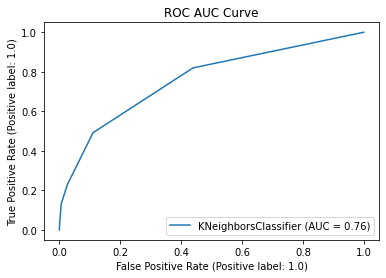

In [129]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(KNC,x_test,y_test)
plt.title('ROC AUC Curve')
plt.show()

### Saving the model

In [131]:
import joblib
joblib.dump(KNC,"HR_Analytics_Project.pkl")

['HR_Analytics_Project.pkl']